In [1]:
#Importing the libraries
import numpy as np
import torch as th
import torch 
from transformers import BertTokenizer, BertModel
import pandas as pd
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler


device = th.device('cuda') if th.cuda.is_available() else th.device('cpu')
print(f'Using device: {device}')

Using device: cuda


In [5]:
#Split the data into training and testing sets

path=r"data/best_200songs_per20artist.csv"

#load the data
data = pd.read_csv(path)

# Convert the embeddings from strings to lists
data['embeddings'] = data['embeddings'].apply(ast.literal_eval)

# Convert the labels from strings to lists
embeddings = th.tensor(data['embeddings'].tolist())

# Convert the labels from strings to lists   
labels = th.tensor(data['labels'].tolist())


# Split the data into training and testing sets
train_embeddings, test_embeddings, train_labels, test_labels = train_test_split(
    embeddings, labels, test_size=0.2, random_state=42, stratify=labels
)

# Verify the shapes
print("Train embeddings shape:", train_embeddings.shape)
print("Test embeddings shape:", test_embeddings.shape)
print("Train labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

Train embeddings shape: torch.Size([3040, 768])
Test embeddings shape: torch.Size([760, 768])
Train labels shape: torch.Size([3040])
Test labels shape: torch.Size([760])


#### Only Artist Classificator (Please refear to "Multitask and LSTM models" for the Genre and Artist classifiers)

In [3]:
# SIMPLE CLASSIFIER
#MODELS

# Classifier with one hidden layer, ReLU activation, and an output layer
class SimpleClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


# IMPROVED CLASSIFIER 
# with two hidden layers, ReLU activation and dropout, and an output layer
#dropout is used to prevent overfitting

class ImprovedClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ImprovedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)  
        self.relu1 = nn.ReLU() 
        self.dropout1 = nn.Dropout(0.5)  
        self.fc2 = nn.Linear(512, 256)  
        self.relu2 = nn.ReLU() 
        self.dropout2 = nn.Dropout(0.5) 
        self.fc3 = nn.Linear(256, num_classes)  
    
    def forward(self, x):
        x = self.fc1(x)  
        x = self.relu1(x)  
        x = self.dropout1(x)  
        x = self.fc2(x)  # hidden layer
        x = self.relu2(x)  
        x = self.dropout2(x)  
        x = self.fc3(x)  # output layer
        return x

# ENHANCED CLASSIFIER    
# here we have added a third hidden layer to the model
class EnhancedClassifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(EnhancedClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)
        self.fc4 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc4(x)
        return x    




# Set the input size and number of classes
input_size = train_embeddings.shape[1]  # size of the embeddings
num_classes = len(set(labels.tolist()))  # number of unique labels(artist in our case)

# Select the model to use
#model = SimpleClassifier(input_size, num_classes).to(device)
#model = ImprovedClassifier(input_size, num_classes).to(device)
model = EnhancedClassifier(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)



In [4]:
# Train the model 
num_epochs = 350
for epoch in range(num_epochs):
    model.train()
    outputs = model(train_embeddings.to(device))
    loss = criterion(outputs, train_labels.to(device))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/350], Loss: 2.9966
Epoch [2/350], Loss: 2.9904
Epoch [3/350], Loss: 2.9838
Epoch [4/350], Loss: 2.9728
Epoch [5/350], Loss: 2.9602
Epoch [6/350], Loss: 2.9445
Epoch [7/350], Loss: 2.9193
Epoch [8/350], Loss: 2.8960
Epoch [9/350], Loss: 2.8653
Epoch [10/350], Loss: 2.8450
Epoch [11/350], Loss: 2.7974
Epoch [12/350], Loss: 2.7590
Epoch [13/350], Loss: 2.7404
Epoch [14/350], Loss: 2.7017
Epoch [15/350], Loss: 2.6723
Epoch [16/350], Loss: 2.6435
Epoch [17/350], Loss: 2.6043
Epoch [18/350], Loss: 2.5835
Epoch [19/350], Loss: 2.5541
Epoch [20/350], Loss: 2.5127
Epoch [21/350], Loss: 2.5069
Epoch [22/350], Loss: 2.4729
Epoch [23/350], Loss: 2.4486
Epoch [24/350], Loss: 2.4412
Epoch [25/350], Loss: 2.4349
Epoch [26/350], Loss: 2.3891
Epoch [27/350], Loss: 2.3785
Epoch [28/350], Loss: 2.3482
Epoch [29/350], Loss: 2.3422
Epoch [30/350], Loss: 2.3299
Epoch [31/350], Loss: 2.2910
Epoch [32/350], Loss: 2.2629
Epoch [33/350], Loss: 2.2449
Epoch [34/350], Loss: 2.2152
Epoch [35/350], Loss: 2

Accuracy on test set: 0.5737


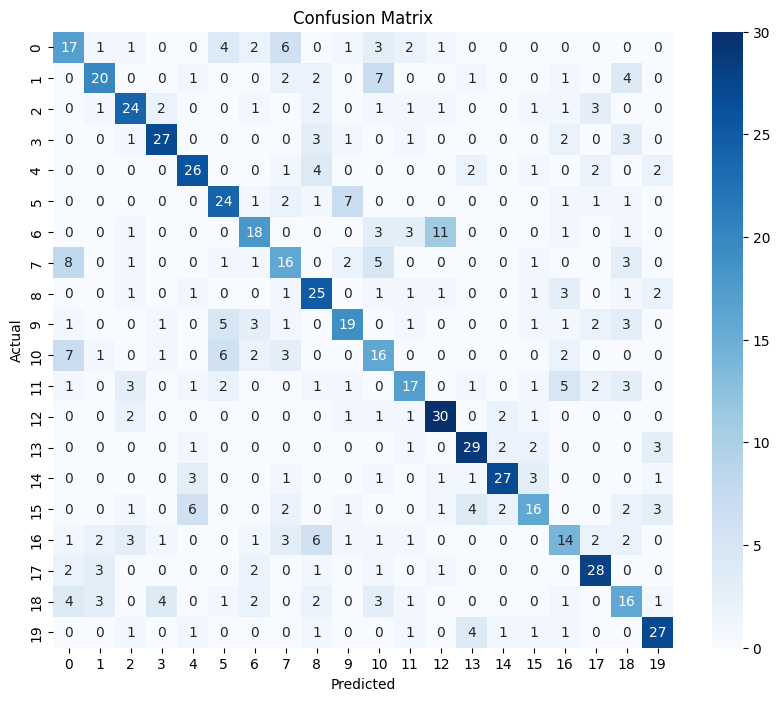

In [5]:
#Evaluate the model and calculate the accuracy, confusion matrix and display it

# Evaluate the model
model.eval()
with th.no_grad():
    test_outputs = model(test_embeddings.to(device))
    _, predicted = th.max(test_outputs, 1)
    correct = (predicted == test_labels.to(device)).sum().item()
    accuracy = correct / test_labels.size(0)
    print(f'Accuracy on test set: {accuracy:.4f}')

# Confusion matrix
predicted = predicted.cpu().numpy()
test_labels = test_labels.cpu().numpy()

cm = confusion_matrix(test_labels, predicted)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(test_labels), yticklabels=set(test_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
#restare the model if needed
model = SimpleClassifier(input_size, num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Multitask and LSTM models:

### MULTITASK


In [6]:
# MULTITASK MODER FOR GENRE AND ARTIST CLASSIFICATION

# Create a mapping of genres and artists to indices
genre_to_index = {genre: idx for idx, genre in enumerate(data['tag'].unique())}
artist_to_index = {artist: idx for idx, artist in enumerate(data['artist'].unique())}

# Convert the genre and artist labels to tensors
genre_labels = th.tensor([genre_to_index[genre] for genre in data['tag'].tolist()])
artist_labels = th.tensor([artist_to_index[artist] for artist in data['artist'].tolist()])

# Divide the data into training and testing sets
train_embeddings, test_embeddings, train_genre_labels, test_genre_labels, train_artist_labels, test_artist_labels = train_test_split(
    embeddings, genre_labels, artist_labels, test_size=0.2, random_state=42, stratify=artist_labels
)

# Define a multitask neural network for genre and artist classification the model has two output heads, one for genre and one for artist and 
# the model is trained to minimize the loss of both tasks simultaneously
class MultitaskClassifier(nn.Module):
    def __init__(self, input_size, num_genres, num_artists):
        super(MultitaskClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(1024, 512)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(512, 256)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.5)
        self.genre_head = nn.Linear(256, num_genres)
        self.artist_head = nn.Linear(256, num_artists)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        genre_output = self.genre_head(x)
        artist_output = self.artist_head(x)
        return genre_output, artist_output

# Model parameters
input_size = train_embeddings.shape[1]
num_genres = len(genre_to_index)
num_artists = len(artist_to_index)

model = MultitaskClassifier(input_size, num_genres, num_artists).to(device)

# Define the loss functions and optimizer
criterion_genre = nn.CrossEntropyLoss()
criterion_artist = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-5)

# Additional parameters to control the training process between the two tasks
weight_genre_loss = 0.25  
weight_artist_loss = 0.75  

# Train the model
num_epochs = 350
for epoch in range(num_epochs):
    model.train()
    genre_outputs, artist_outputs = model(train_embeddings.to(device))
    loss_genre = criterion_genre(genre_outputs, train_genre_labels.to(device))
    loss_artist = criterion_artist(artist_outputs, train_artist_labels.to(device))
    loss = weight_genre_loss * loss_genre + weight_artist_loss * loss_artist

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Genre Loss: {loss_genre.item():.4f}, Artist Loss: {loss_artist.item():.4f}')


Epoch [1/350], Loss: 2.6528, Genre Loss: 1.6143, Artist Loss: 2.9990
Epoch [2/350], Loss: 2.6437, Genre Loss: 1.5982, Artist Loss: 2.9922
Epoch [3/350], Loss: 2.6374, Genre Loss: 1.5879, Artist Loss: 2.9872
Epoch [4/350], Loss: 2.6276, Genre Loss: 1.5735, Artist Loss: 2.9790
Epoch [5/350], Loss: 2.6184, Genre Loss: 1.5612, Artist Loss: 2.9708
Epoch [6/350], Loss: 2.6006, Genre Loss: 1.5421, Artist Loss: 2.9534
Epoch [7/350], Loss: 2.5850, Genre Loss: 1.5197, Artist Loss: 2.9400
Epoch [8/350], Loss: 2.5586, Genre Loss: 1.4945, Artist Loss: 2.9132
Epoch [9/350], Loss: 2.5347, Genre Loss: 1.4666, Artist Loss: 2.8908
Epoch [10/350], Loss: 2.4989, Genre Loss: 1.4259, Artist Loss: 2.8565
Epoch [11/350], Loss: 2.4585, Genre Loss: 1.3889, Artist Loss: 2.8150
Epoch [12/350], Loss: 2.4215, Genre Loss: 1.3555, Artist Loss: 2.7769
Epoch [13/350], Loss: 2.3817, Genre Loss: 1.3328, Artist Loss: 2.7313
Epoch [14/350], Loss: 2.3490, Genre Loss: 1.3113, Artist Loss: 2.6949
Epoch [15/350], Loss: 2.3301,

### LSTM

In [4]:
#LSTM MODEL

path=r"./data/best_200songs_per20artist.csv"

#load the data
data = pd.read_csv(path)

# create genre and artist to index
genre_to_index = {genre: idx for idx, genre in enumerate(data['tag'].unique())}
artist_to_index = {artist: idx for idx, artist in enumerate(data['artist'].unique())}

# convert to tensors
genre_labels = torch.tensor([genre_to_index[genre] for genre in data['tag'].tolist()])
artist_labels = torch.tensor([artist_to_index[artist] for artist in data['artist'].tolist()])

data['embeddings'] = data['embeddings'].apply(ast.literal_eval)
embeddings = torch.tensor(data['embeddings'].tolist())

# split the dataset into train and test
train_embeddings, test_embeddings, train_genre_labels, test_genre_labels, train_artist_labels, test_artist_labels = train_test_split(
    embeddings, genre_labels, artist_labels, test_size=0.2, random_state=42, stratify=artist_labels
)

# Standardising embeddings
scaler = StandardScaler()
train_embeddings = torch.tensor(scaler.fit_transform(train_embeddings)).float()
test_embeddings = torch.tensor(scaler.transform(test_embeddings)).float()

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_genres, num_artists):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.genre_fc = nn.Linear(hidden_size, num_genres)
        self.artist_fc = nn.Linear(hidden_size, num_artists)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        
        out, _ = self.lstm(x.unsqueeze(1), (h0, c0)) 
        out = out[:, -1, :]  
        
        genre_out = self.genre_fc(out)
        artist_out = self.artist_fc(out)
        
        return genre_out, artist_out

# Hyperparameters
input_size = train_embeddings.shape[1]  
hidden_size = 512
num_layers = 1
num_genres = len(genre_to_index)
num_artists = len(artist_to_index)
# create the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LSTMModel(input_size, hidden_size, num_layers, num_genres, num_artists)
model = model.to(device)

# loss and  optimezer 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

# Train parameters
num_epochs = 350

# Train function
def train_model(model, train_embeddings, train_genre_labels, train_artist_labels, criterion, optimizer, num_epochs):
    model.train()
    for epoch in range(num_epochs):
        
        train_embeddings = train_embeddings.to(device)
        train_genre_labels = train_genre_labels.to(device)
        train_artist_labels = train_artist_labels.to(device)

        optimizer.zero_grad()
        genre_outputs, artist_outputs = model(train_embeddings)
        genre_loss = criterion(genre_outputs, train_genre_labels)
        artist_loss = criterion(artist_outputs, train_artist_labels)
        loss = genre_loss + artist_loss

        loss.backward()
        optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

train_model(model, train_embeddings, train_genre_labels, train_artist_labels, criterion, optimizer, num_epochs)


Epoch [1/350], Loss: 4.5834
Epoch [2/350], Loss: 4.4488
Epoch [3/350], Loss: 4.3248
Epoch [4/350], Loss: 4.2104
Epoch [5/350], Loss: 4.1049
Epoch [6/350], Loss: 4.0077
Epoch [7/350], Loss: 3.9179
Epoch [8/350], Loss: 3.8342
Epoch [9/350], Loss: 3.7556
Epoch [10/350], Loss: 3.6813
Epoch [11/350], Loss: 3.6106
Epoch [12/350], Loss: 3.5428
Epoch [13/350], Loss: 3.4776
Epoch [14/350], Loss: 3.4145
Epoch [15/350], Loss: 3.3533
Epoch [16/350], Loss: 3.2938
Epoch [17/350], Loss: 3.2358
Epoch [18/350], Loss: 3.1794
Epoch [19/350], Loss: 3.1243
Epoch [20/350], Loss: 3.0707
Epoch [21/350], Loss: 3.0184
Epoch [22/350], Loss: 2.9674
Epoch [23/350], Loss: 2.9177
Epoch [24/350], Loss: 2.8693
Epoch [25/350], Loss: 2.8220
Epoch [26/350], Loss: 2.7758
Epoch [27/350], Loss: 2.7306
Epoch [28/350], Loss: 2.6865
Epoch [29/350], Loss: 2.6432
Epoch [30/350], Loss: 2.6008
Epoch [31/350], Loss: 2.5592
Epoch [32/350], Loss: 2.5183
Epoch [33/350], Loss: 2.4781
Epoch [34/350], Loss: 2.4385
Epoch [35/350], Loss: 2

### Model evaluation and confusion Matrix

Accuracy on test set for genres: 0.7224
Accuracy on test set for artists: 0.5645


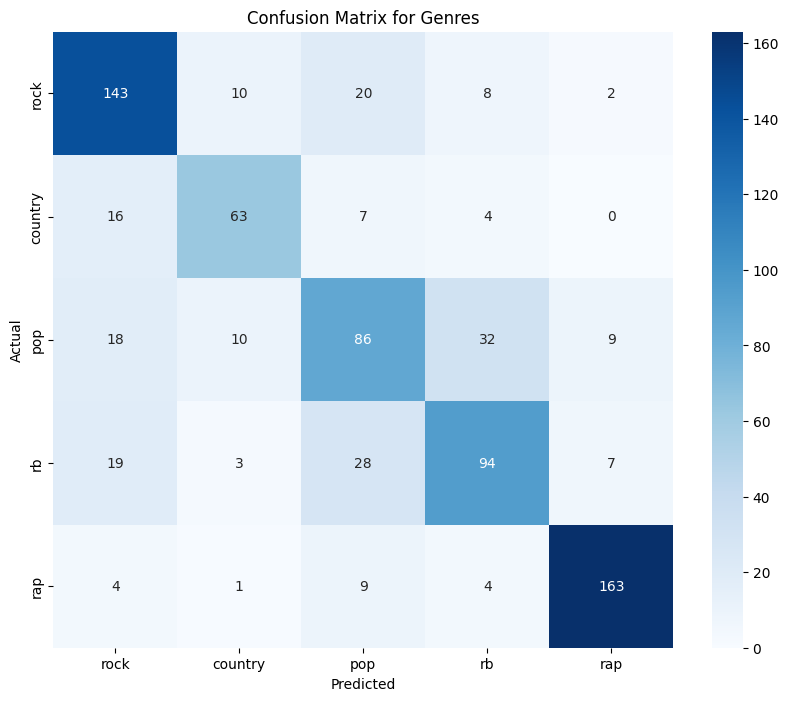

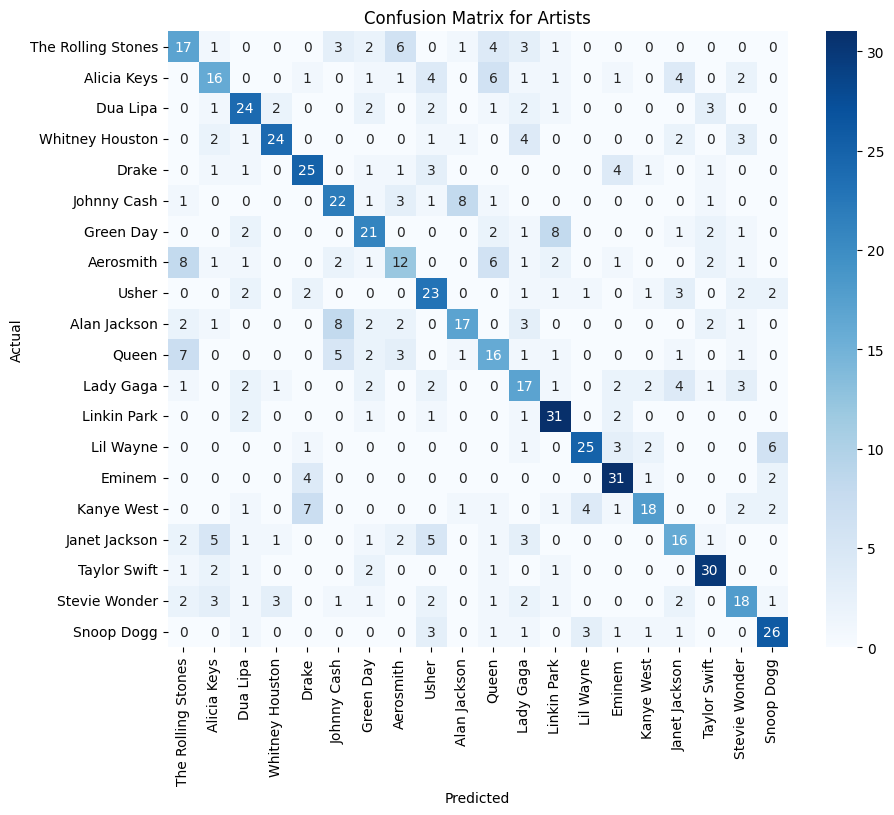

In [7]:
# MODEL EVALUATION AND CONFUSION MATRIX

model.eval()
with th.no_grad():
    genre_outputs, artist_outputs = model(test_embeddings.to(device))
    _, predicted_genres = th.max(genre_outputs, 1)
    _, predicted_artists = th.max(artist_outputs, 1)
    correct_genres = (predicted_genres == test_genre_labels.to(device)).sum().item()
    correct_artists = (predicted_artists == test_artist_labels.to(device)).sum().item()
    accuracy_genres = correct_genres / test_genre_labels.size(0)
    accuracy_artists = correct_artists / test_artist_labels.size(0)
    print(f'Accuracy on test set for genres: {accuracy_genres:.4f}')
    print(f'Accuracy on test set for artists: {accuracy_artists:.4f}')

# Convert the predictions and labels to numpy arrays
predicted_genres = predicted_genres.cpu().numpy()
test_genre_labels_np = test_genre_labels.cpu().numpy()
predicted_artists = predicted_artists.cpu().numpy()
test_artist_labels_np = test_artist_labels.cpu().numpy()

# Confusion matrix for genres
cm_genres = confusion_matrix(test_genre_labels_np, predicted_genres)

# Confusion matrix for artists
cm_artists = confusion_matrix(test_artist_labels_np, predicted_artists)

def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

genre_labels_list = [label for label, _ in sorted(genre_to_index.items(), key=lambda item: item[1])]
artist_labels_list = [label for label, _ in sorted(artist_to_index.items(), key=lambda item: item[1])]

plot_confusion_matrix(cm_genres, genre_labels_list, 'Confusion Matrix for Genres')
plot_confusion_matrix(cm_artists, artist_labels_list, 'Confusion Matrix for Artists')

### Prediction of artist and genre

In [8]:
#Song evaluation

def predict_genre_and_artist(new_lyrics, model, scaler, genre_to_index, artist_to_index, device):
    # tokenizer and BERT model
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    bert_model = BertModel.from_pretrained('bert-base-uncased').to(device)
    
    # Tokenise the lyrics of the new song
    tokens = tokenizer(new_lyrics, padding=True, truncation=True, return_tensors='pt')
    input_ids = tokens['input_ids'].to(device)
    
    # embeddings of the new song
    with torch.no_grad():
        outputs = bert_model(input_ids=input_ids)
        embeddings = outputs.last_hidden_state[:, 0, :]
        embeddings = embeddings.cpu()
    
    # Standardising embeddings
    embeddings = torch.tensor(scaler.transform(embeddings)).float()
    embeddings = embeddings.to(device)
    
    model.eval()
    
    # predicctions
    with torch.no_grad():
        genre_outputs, artist_outputs = model(embeddings)
        genre_pred = torch.argmax(genre_outputs, dim=1)
        artist_pred = torch.argmax(artist_outputs, dim=1)
    
    # Extract the artist and genre according to prediction
    predicted_genre = [genre for genre, idx in genre_to_index.items() if idx == genre_pred.item()][0]
    predicted_artist = [artist for artist, idx in artist_to_index.items() if idx == artist_pred.item()][0]
    
    return predicted_genre, predicted_artist


new_lyrics = input("Enter the lyrics of the new song: ")
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')


predicted_genre, predicted_artist = predict_genre_and_artist(new_lyrics, model, scaler, genre_to_index, artist_to_index, device)
print(f'The predicted genre is: {predicted_genre}')
print(f'The predicted artist is: {predicted_artist}')



The predicted genre is: rock
The predicted artist is: Linkin Park


c:\Users\JOSDA\Desktop\Autonomous systems\Second semester\NLP\Project\GIT\NLP_project\venv\Lib\site-packages\transformers\models\bert\modeling_bert.py:435: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
